In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('placement.csv')
df.sample(5)

,cgpa,placement_exam_marks,placed
117,7.11,0.0,1
807,7.16,19.0,1
155,7.84,12.0,0
277,6.45,15.0,1
229,6.68,13.0,0


# Plot Show in CGPA and Placement Marks


C:\Users\ripon\AppData\Local\Temp\ipykernel_1072\1639537101.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
c:\Users\ripon\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ripon\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inste

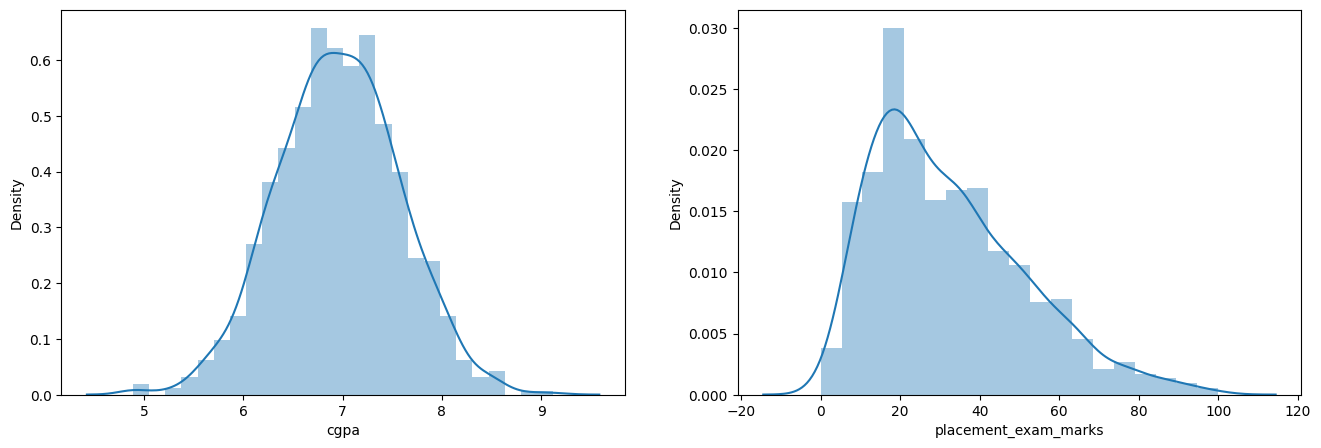

In [4]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])


plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

#### Describe Placement marks


In [5]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

## Draw BOX Plot


<Axes: >

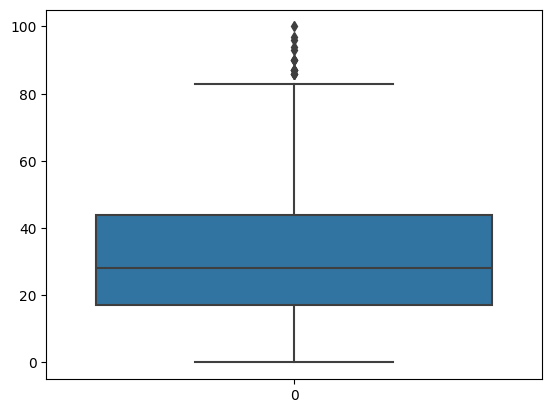

In [28]:
sns.boxplot(df['placement_exam_marks'])

### Finding IQR Value


In [7]:
percentile_75 = df['placement_exam_marks'].quantile(0.75)
percentile_25 = df['placement_exam_marks'].quantile(0.25)

In [8]:
percentile_25

17.0

In [9]:
percentile_75

44.0

## Calculate IQR (Q3-Q1)


In [11]:
iqr = percentile_75-percentile_25
iqr

27.0

### Calculate Upper Limit and lower Limit


In [16]:
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

print("Upper limit ", upper_limit)
print("Lower limit ", lower_limit)

Upper limit  84.5
Lower limit  -23.5


### Finding Outliers in Upper Limit


In [17]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [23]:
df[df['placement_exam_marks'] > upper_limit].shape

(15, 3)

### Finding Outliers in Lower Limit


In [22]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


# Apply Trimming


In [24]:
new_df = df[(df['placement_exam_marks'] < upper_limit)]

In [26]:
new_df.shape # total row 1000 . outlier/garbade - 15 . apply trim (1000-15)=985 and column 3

(985, 3)

## Compare Before trimming and after trimming


C:\Users\ripon\AppData\Local\Temp\ipykernel_1072\2774303763.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
c:\Users\ripon\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ripon\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

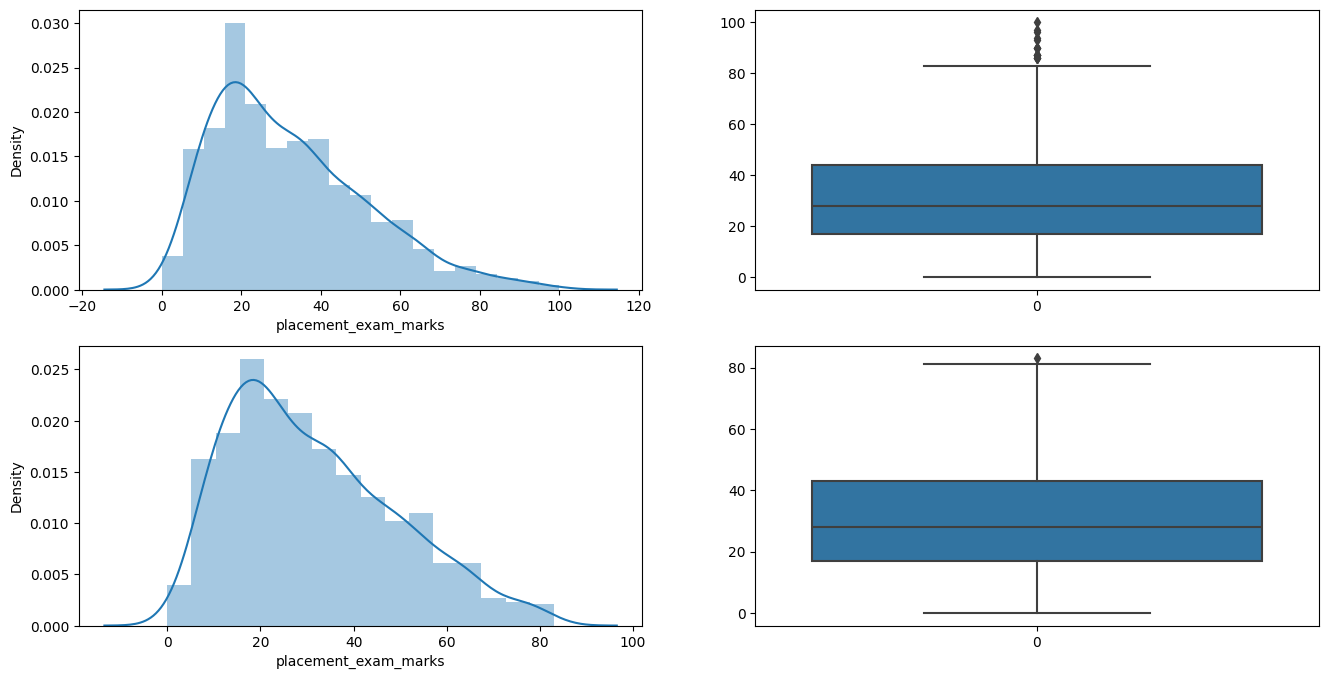

In [29]:
plt.figure(figsize=(16,8))

# df before trimming

plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])


plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

# new_df (after trimming)

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])


plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])




plt.show()